<a href="https://colab.research.google.com/github/lmkelly16/BYU-REU-2022/blob/main/ZOI_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Imports
import pandas as pd
import numpy as np
import glob
import gdal

# Our image processing tools
import skimage.filters
import skimage.io
import skimage.morphology

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


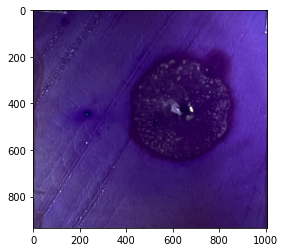

In [3]:
# load the path
path = '/content/drive/MyDrive/BYU_REU_images/1Z_44_B.tiff'

# Load the phase contrast image.
im = skimage.io.imread(path)

# look at it
plt.imshow(im);

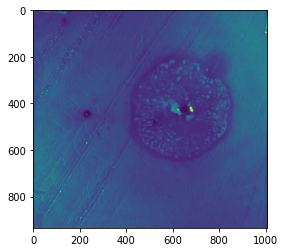

In [4]:
cim = im[:,:,0]
plt.imshow(cim);

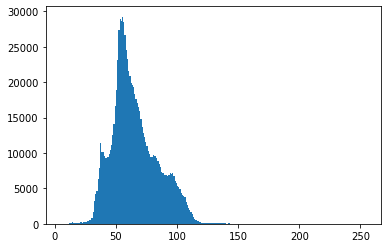

In [5]:
# forcing bins to be discretized by integer value
bins = np.arange(cim.min(), cim.max(), 1)

# plot histogram
plt.hist(cim.flatten(), bins=bins);

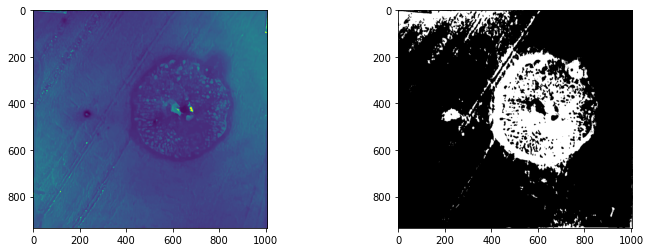

In [13]:
''' Thresholding '''
# Threshold value, as obtained by eye
im_thresh = 50

# Generate thresholded image
im_bw = cim < im_thresh

# plot orginal and thresholded next to each other
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].imshow(cim)
ax[1].imshow(im_bw, cmap=plt.cm.gray);

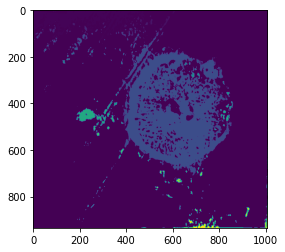

In [14]:
''' Labeling a segmented image '''

# labels whatever you segmented out (bacteria for example)
labeled = skimage.measure.label(im_bw)
plt.imshow(labeled);

In [18]:
len(labeled)
labeled.max()

935

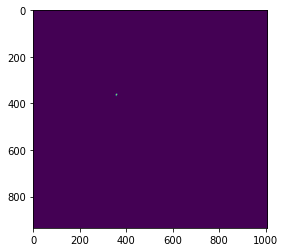

In [31]:
x = (labeled == 300)
plt.imshow(x);

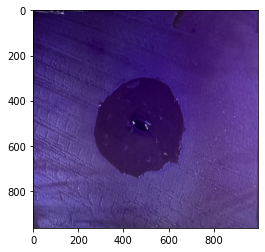

In [43]:
# load the path
path2 = '/content/drive/MyDrive/BYU_REU_images/1Z_+_B.tiff'

# Load the phase contrast image.
im2 = skimage.io.imread(path2)

# look at it
plt.imshow(im2);

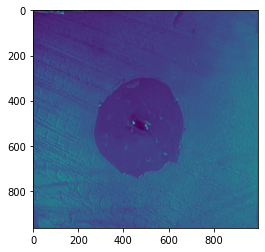

In [44]:
cim2 = im[:,:,0]
plt.imshow(cim2);

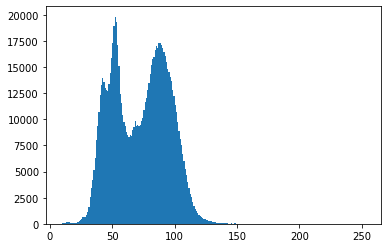

In [45]:
# forcing bins to be discretized by integer value
bins = np.arange(cim2.min(), cim2.max(), 1)

# plot histogram
plt.hist(cim2.flatten(), bins=bins);

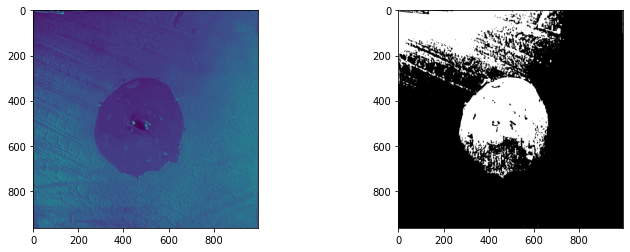

In [52]:
''' Thresholding '''
# Threshold value, as obtained by eye
im_thresh = 52

# Generate thresholded image
im_bw2 = cim2 < im_thresh

# plot orginal and thresholded next to each other
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].imshow(cim2)
ax[1].imshow(im_bw2, cmap=plt.cm.gray);

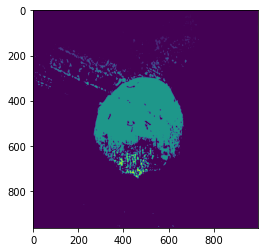

In [53]:
''' Labeling a segmented image '''

# labels whatever you segmented out (bacteria for example)
labeled2 = skimage.measure.label(im_bw2)
plt.imshow(labeled2);

In [57]:
labeled.max()

430

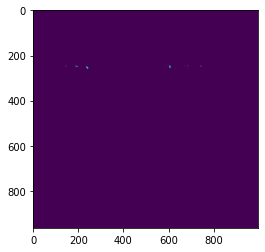

In [71]:
bacteria = (labeled == 130)
bacteria2 = (labeled == 131)
bacteria3 = (labeled == 132)
bacteria4 = (labeled == 133)
bacteria5 = (labeled == 134)
bacteria6 = (labeled == 135)
bacteria7 = (labeled == 136)
bacteria8 = (labeled == 137)
bacteria9 = (labeled == 138)
bacteria10 = (labeled == 139)

final = bacteria + bacteria2 + bacteria3 + bacteria4 + bacteria5 + bacteria6 + bacteria7 + bacteria8 + bacteria9 + bacteria10
plt.imshow(final)

In [55]:
labeled2

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 6],
       [1, 1, 1, ..., 0, 0, 6],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)